# ONLINE NEWS POPULARITY PREDICTION

## Project Description
This project aims to predict the popularity of online news articles based on various features such as content attributes, social engagement metrics, and textual properties. The dataset is sourced from the UCI Machine Learning Repository and contains multiple attributes that influence article popularity.

## Dataset Information
- *Source:* UCI Machine Learning Repository
- *Features:* The dataset consists of 17 columns, including numerical and categorical attributes such as article length, keyword frequency, and social shares.
- *Target Variable:* Popularity score of the article.
-

# Load dataset only once
file_path = "C:\\Users\\uw\\Downloads\\MAIN ONLINE NEWS POPULARITY.csv"
df = pd.read_csv(file_path)
print("Dataset shape after loading:", df.shape)
```

# import necessary libraries

In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
from sklearn.pipeline import Pipeline


In [10]:
#load the dataset
dataset_url =r"C:\Users\uw\Downloads\MAIN ONLINE NEWS POPULARITY.csv"
df = pd.read_csv(dataset_url)

In [12]:
# display basic information
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1    kw_avg_min                    39644 non-null  float64
 2    kw_avg_max                    39644 non-null  float64
 3    kw_max_avg                    39644 non-null  float64
 4    self_reference_min_shares     39644 non-null  float64
 5    self_reference_max_shares     39644 non-null  float64
 6    self_reference_avg_sharess    39644 non-null  float64
 7    LDA_02                        39644 non-null  float64
 8    LDA_03                        39644 non-null  float64
 9    global_subjectivity           39644 non-null  float64
 10   avg_negative_polarity         39644 non-null  float64
 11   max_negative_polarity         39644 non-null  float64
 12   title_subjectivity         

In [14]:
# handing missing values
df = df.dropna()

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewed_features = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [18]:
print("Skewness of numeric features:\n", skewed_features)

Skewness of numeric features:
 shares                          33.962600
kw_avg_min                      31.304924
self_reference_min_shares       26.263370
self_reference_avg_sharess      17.913416
kw_max_avg                      16.411049
self_reference_max_shares       13.870324
abs_title_sentiment_polarity     1.704129
LDA_02                           1.311645
LDA_03                           1.238669
title_subjectivity               0.816054
kw_avg_max                       0.624286
title_sentiment_polarity         0.396094
avg_negative_polarity           -0.551623
abs_title_subjectivity          -0.624126
global_subjectivity             -1.372637
max_negative_polarity           -3.459616
dtype: float64


In [20]:
from sklearn.preprocessing import PowerTransformer

In [22]:
transformer = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = transformer.fit_transform(df[numeric_cols])

In [24]:
# univariate analysis
def univariate_analysis(data):
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Univariate Analysis: {col}')

In [26]:
plt.show()

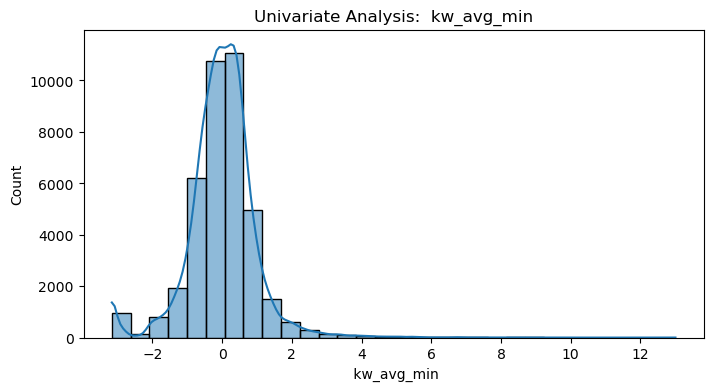

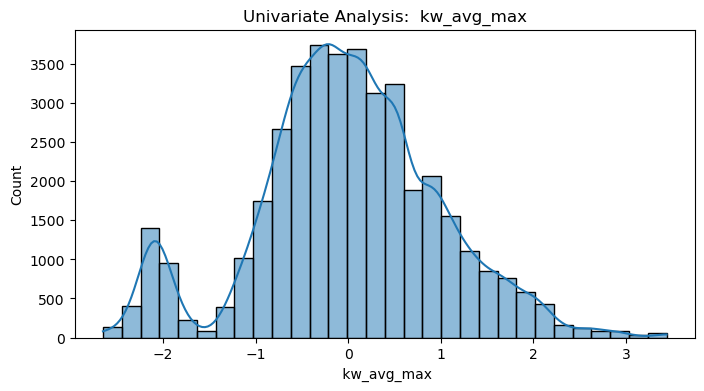

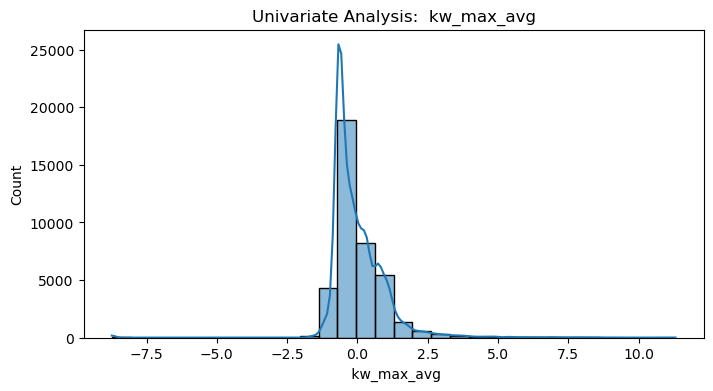

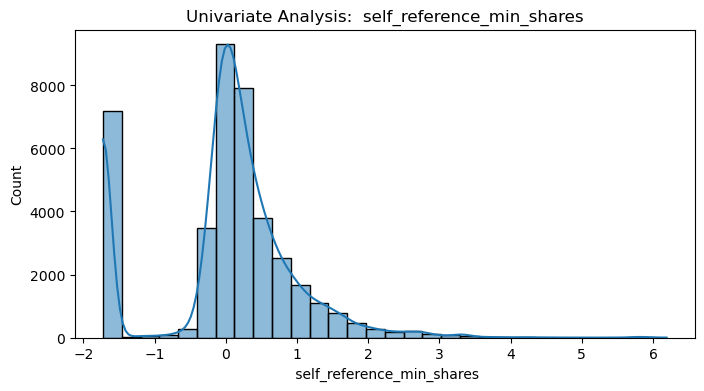

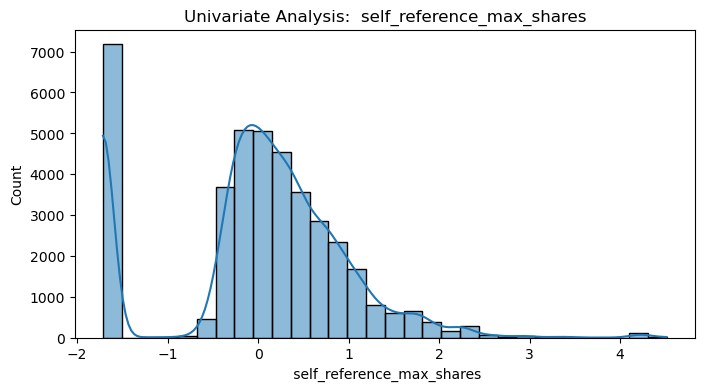

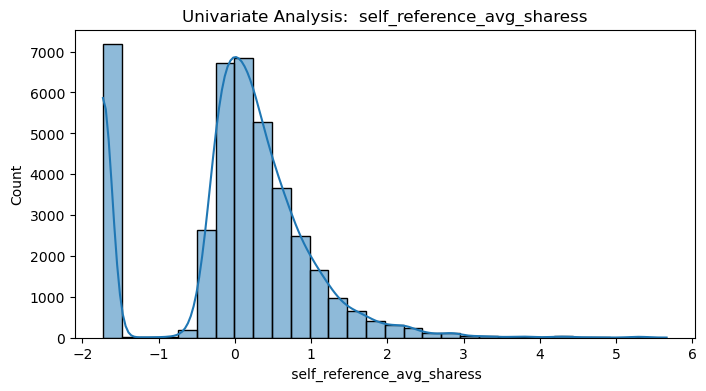

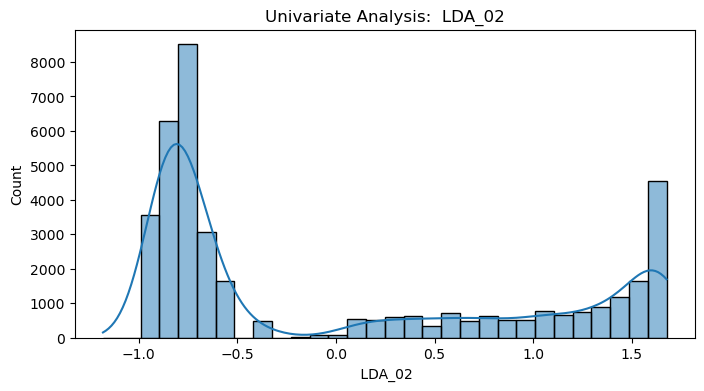

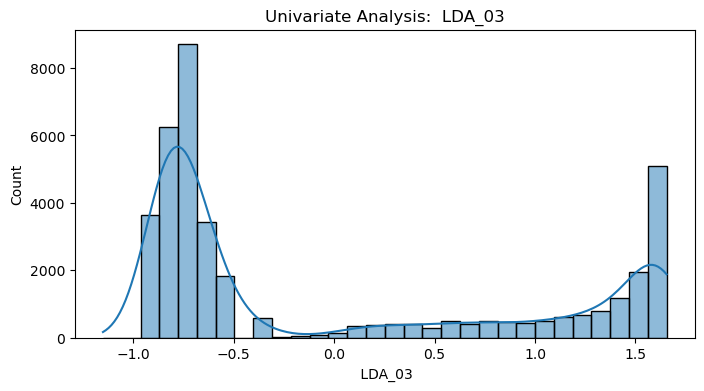

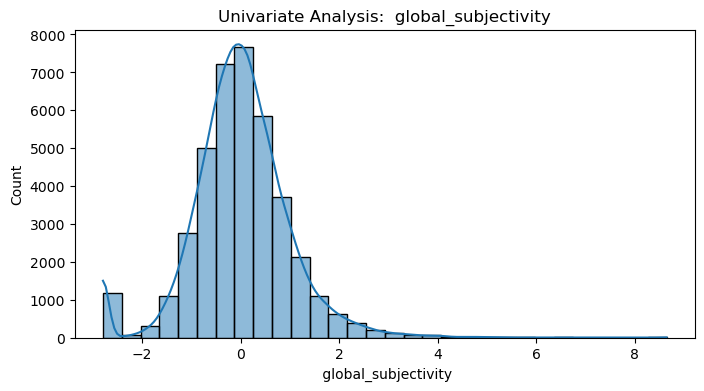

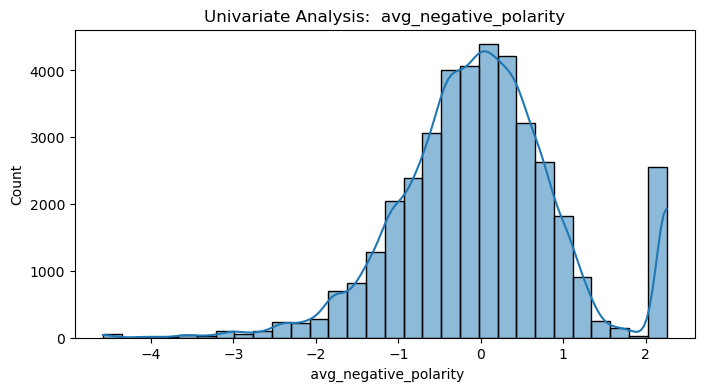

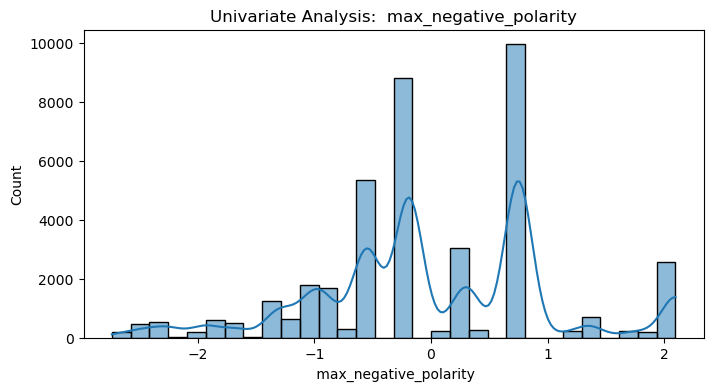

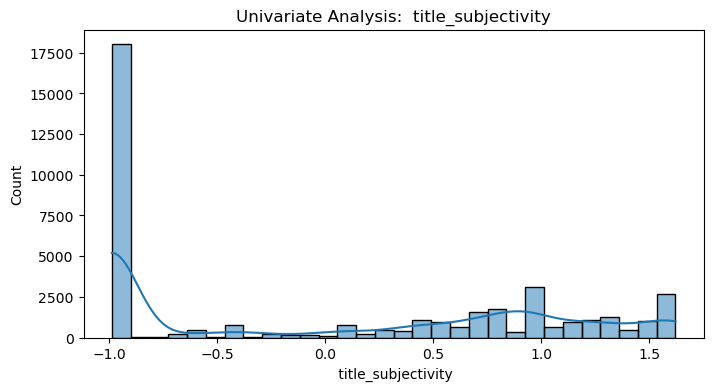

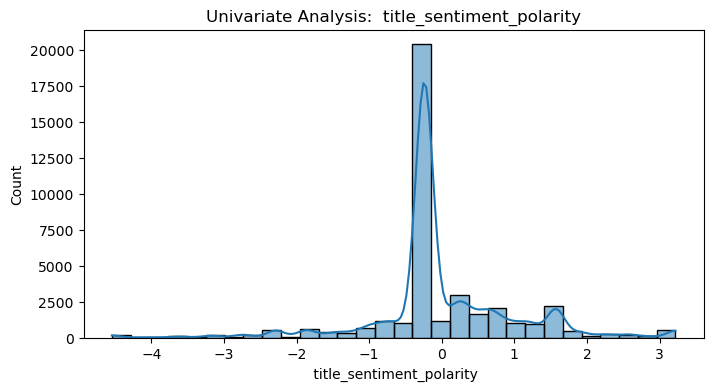

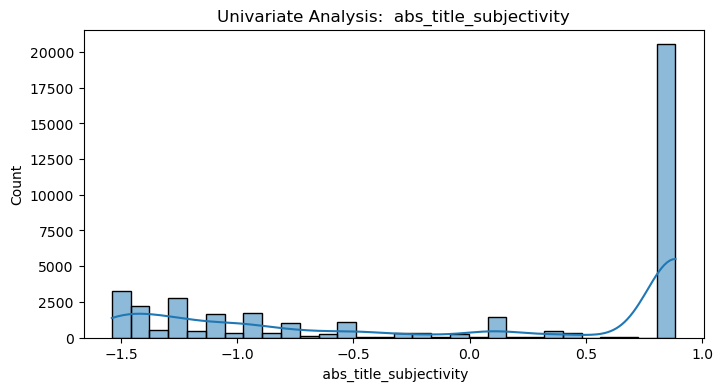

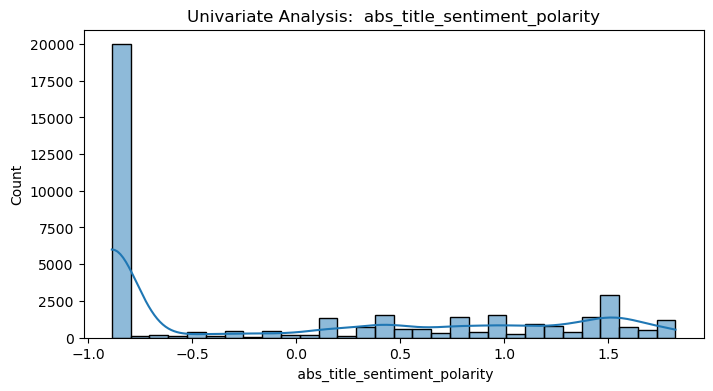

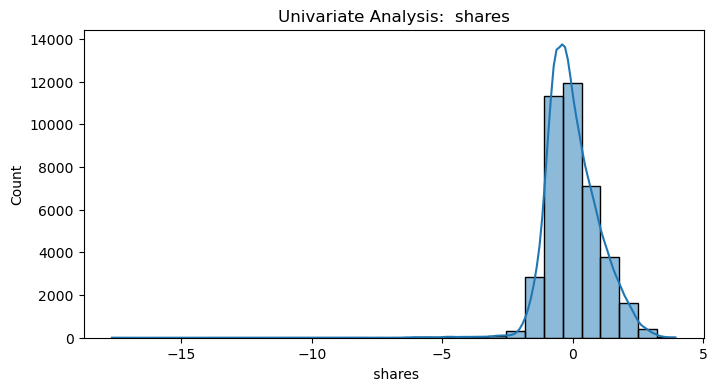

In [28]:
univariate_analysis(df)

In [30]:
# bivariate analysis
def bivariate_analysis(data):
    sns.pairplot(data, diag_kind='kde')

In [32]:
plt.show()

In [34]:
#df = pd.read_csv(r"C:\Users\uw\Downloads\MAIN ONLINE NEWS POPULARITY.csv")

In [36]:
#numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
#skewed_features = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [38]:
#print("Skewness of numeric features:\n", skewed_features)

In [40]:
#transformer = PowerTransformer(method='yeo-johnson')
#df[numeric_cols] = transformer.fit_transform(df[numeric_cols])

In [42]:
# feature selection
df.columns = df.columns.str.replace(r'\xa0', '', regex=True)  
df.columns = df.columns.str.strip() 

In [44]:
print(df.columns)

Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')


In [46]:
X = df.drop(columns=['shares'])
y = df['shares']

In [48]:
df.columns = df.columns.str.strip()

In [50]:
if "shares" in df.columns:
    df["shares"] = pd.to_numeric(df["shares"], errors="coerce")
    df.dropna(subset=["shares"],inplace=True)

In [52]:
numeric_df = df.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix["shares"].abs()

In [54]:
threshold = 0.1
selected_features = target_corr[target_corr > threshold].index.tolist()
df_filtered = df[selected_features]

In [56]:
print(type(X))  
print(X.head())

<class 'pandas.core.frame.DataFrame'>
                                                 url  kw_avg_min  kw_avg_max  \
0  http://mashable.com/2013/01/07/amazon-instant-...   -2.879331    -2.64991   
1  http://mashable.com/2013/01/07/ap-samsung-spon...   -2.879331    -2.64991   
2  http://mashable.com/2013/01/07/apple-40-billio...   -2.879331    -2.64991   
3  http://mashable.com/2013/01/07/astronaut-notre...   -2.879331    -2.64991   
4   http://mashable.com/2013/01/07/att-u-verse-apps/   -2.879331    -2.64991   

   kw_max_avg  self_reference_min_shares  self_reference_max_shares  \
0   -8.734902                  -0.292303                  -0.563888   
1   -8.734902                  -1.723839                  -1.714075   
2   -8.734902                  -0.035299                  -0.359504   
3   -8.734902                  -1.723839                  -1.714075   
4   -8.734902                  -0.254921                   0.971402   

   self_reference_avg_sharess    LDA_02    LDA_03  glo

In [58]:
X = X.select_dtypes(include=[np.number])

In [60]:
correlation_matrix = X.corr()

In [62]:
threshold = 0.85

In [64]:
corr_features = set()
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][correlation_matrix[col] > threshold].index.tolist()
    high_corr.remove(col) if col in high_corr else None
    corr_features.update(high_corr)

In [66]:
print("Highly Correlated Features to Remove:", corr_features)

Highly Correlated Features to Remove: {'self_reference_max_shares', 'self_reference_min_shares', 'self_reference_avg_sharess'}


In [68]:
X_filtered = X.drop(columns=corr_features)

In [70]:
print("Remaining Features:", X_filtered.columns)

Remaining Features: Index(['kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'LDA_02', 'LDA_03',
       'global_subjectivity', 'avg_negative_polarity', 'max_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity'],
      dtype='object')


In [72]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
print("Train Shape:",X_train.shape)
print("Test Shape:",X_test.shape)

Train Shape: (31715, 12)
Test Shape: (7929, 12)


In [73]:
df.dropna(inplace=True)

In [74]:
# define features and target variable
print(df.columns)

Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')


In [75]:
df.columns = df.columns.str.strip()

In [80]:
print(df.head())

                                                 url  kw_avg_min  kw_avg_max  \
0  http://mashable.com/2013/01/07/amazon-instant-...   -2.879331    -2.64991   
1  http://mashable.com/2013/01/07/ap-samsung-spon...   -2.879331    -2.64991   
2  http://mashable.com/2013/01/07/apple-40-billio...   -2.879331    -2.64991   
3  http://mashable.com/2013/01/07/astronaut-notre...   -2.879331    -2.64991   
4   http://mashable.com/2013/01/07/att-u-verse-apps/   -2.879331    -2.64991   

   kw_max_avg  self_reference_min_shares  self_reference_max_shares  \
0   -8.734902                  -0.292303                  -0.563888   
1   -8.734902                  -1.723839                  -1.714075   
2   -8.734902                  -0.035299                  -0.359504   
3   -8.734902                  -1.723839                  -1.714075   
4   -8.734902                  -0.254921                   0.971402   

   self_reference_avg_sharess    LDA_02    LDA_03  global_subjectivity  \
0                 

In [82]:
X = df.drop(columns=['shares'])  # 'shares' is the target variable
Y = df['shares']

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#feature scaling

In [87]:
print(X_train.dtypes)

url                              object
kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
self_reference_max_shares       float64
self_reference_avg_sharess      float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object


In [89]:
X = pd.get_dummies(X, drop_first=True)

In [90]:
df = df.drop(['url'], axis=1, errors='ignore')  # Use errors='ignore' to avoid KeyError

In [93]:
X_train = X_train.drop(columns=['url'])
X_test = X_test.drop(columns=['url'])

In [95]:
print(X_train.dtypes)

kw_avg_min                      float64
kw_avg_max                      float64
kw_max_avg                      float64
self_reference_min_shares       float64
self_reference_max_shares       float64
self_reference_avg_sharess      float64
LDA_02                          float64
LDA_03                          float64
global_subjectivity             float64
avg_negative_polarity           float64
max_negative_polarity           float64
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
dtype: object


In [97]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [99]:
print(np.isinf(X_train).values.sum())  # Ensure it works

0


In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
models = {   
    'Linear Regression': LinearRegression(),
     'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()}

In [105]:
#model training and evaluation

In [107]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        'MAE': mean_absolute_error(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'R2 Score': r2_score(Y_test, Y_pred)}

In [109]:
#display result

In [111]:
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE  R2 Score
Linear Regression  0.733756  0.901361  0.074735
Ridge Regression   0.733757  0.901359  0.074737
Decision Tree      1.020774  1.783094 -0.830382
Random Forest      0.715106  0.864476  0.112597
Gradient Boosting  0.711386  0.855054  0.122270


In [113]:
# printing dataset shape
print("Dataset shape after loading:",df.shape)

Dataset shape after loading: (39644, 16)


In [115]:
print("Available columns:", df.columns)

Available columns: Index(['kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_02',
       'LDA_03', 'global_subjectivity', 'avg_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')


In [117]:
df = df.drop(columns=["unnecessary_column"], errors='ignore')

In [119]:
print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape,y_test.shape)

Train Shape: (31715, 15) (31715,)
Test Shape: (7929, 15) (7929,)


In [121]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
# hyperparameter tuning
rf = RandomForestRegressor()

In [125]:
param_dist = {
    "n_estimators":[100, 200, 300],
    "max_depth":[10, 20, None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print("Best Parameters:", rf_random.best_params_)

In [ ]:
# train the best model
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_scaled, y_train)
best_rf.fit(X_train_scaled, y_train)


In [ ]:
# evaluation the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
# save the model
joblib.dump(best_rf, "best_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Save the scaler too

In [ ]:
# build a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2))
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
joblib.dump(pipeline, "model_pipeline.pkl")

In [ ]:
# load the save model and make prediction
loaded_model = joblib.load("best_random_forest_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

loaded_scaler = joblib.load("scaler.pkl")
predictions = loaded_model.predict(X_new_scaled)

print("Predictions:", predictions)